In [ ]:
# TODO descriptions...

In [23]:
from os import listdir, makedirs
from os.path import isfile, join, isdir

from PIL import Image

In [30]:
image_extensions = {'jpg', 'png', 'jpeg'}

def process_image_file(file_path, destination_folder, file_name):
    """
    Function to process raw image and save it to destination folder
    """
    
    # opens a image in RGB mode 
    img = Image.open(file_path)
    
    # size of the image in pixels
    width, height = img.size
    
    # compute dimensions for cropping... to get image with the same height and width
    base_size = min(width, height)
    height_overlay = (height - base_size)/2
    width_overlay = (width - base_size)/2
    
    # cropped image of above dimension 
    new_img = img.crop((width_overlay, height_overlay, width - width_overlay, height - height_overlay)) 
    
    # save final image
    new_img.save('{}/{}.jpg'.format(destination_folder, file_name))

def is_image(file):
    """
    Function to check whether file is a image (by checking file extension)
    """
    file_extensions = file.split('.')
    if len(file_extensions) < 2:
        return False
    return file_extensions[1] in image_extensions

def get_next_index_in_image_folder(img_folder):
    """
    Get next index of a image in destination folder
    """
    indexes = [int(f.split('.')[0]) for f in listdir(img_folder) if isfile(join(img_folder, f)) and is_image(f)]
    if len(indexes) == 0:
        return 0
    return max(indexes) + 1

In [21]:
# process Afremovs' images

# paths
raw_image_folder = "data_set/afremov_raw"
destination_image_folder = "data_set/afremov"

# get all valid images
raw_image_files = [f for f in listdir(raw_image_folder) if isfile(join(raw_image_folder, f)) and is_image(f)]

# create destination folder if it does not exist
makedirs(destination_image_folder, exist_ok=True)

# save images
for i, f in enumerate(raw_image_files):
    process_image_file(join(raw_image_folder, f), destination_image_folder, i)

In [41]:
# process images with activity

# paths
raw_image_folder = "data_set/activities_raw"
destination_image_folder = "data_set/photos"

# get all sub-folders
raw_image_sub_folders = [d for d in listdir(raw_image_folder) if isdir(join(raw_image_folder, d))]

# create destination folder if it does not exist
makedirs(destination_image_folder, exist_ok=True)

# next index to use for an image
next_index = get_next_index_in_image_folder(destination_image_folder)

# process images in each sub-directory
for sub_dir in raw_image_sub_folders:
    sub_dir_path = join(raw_image_folder, sub_dir)
    
    # get images
    raw_image_files = [f for f in listdir(sub_dir_path) if isfile(join(sub_dir_path, f)) and is_image(f)]
    
    # select one image per folder
    process_image_file(join(sub_dir_path, raw_image_files[int(len(raw_image_files)/2)]), destination_image_folder, next_index)
    next_index += 1
    

In [42]:
# process images with faces

# paths
raw_image_folder = "data_set/wiki_faces_raw"
destination_image_folder = "data_set/photos"

# get all valid images
raw_image_files = [f for f in listdir(raw_image_folder) if isfile(join(raw_image_folder, f)) and is_image(f)]

# create destination folder if it does not exist
makedirs(destination_image_folder, exist_ok=True)

# next index to use for an image
next_index = get_next_index_in_image_folder(destination_image_folder)

# save images
for i, f in enumerate(raw_image_files):
    process_image_file(join(raw_image_folder, f), destination_image_folder, i + next_index)


(480, 480, 3)


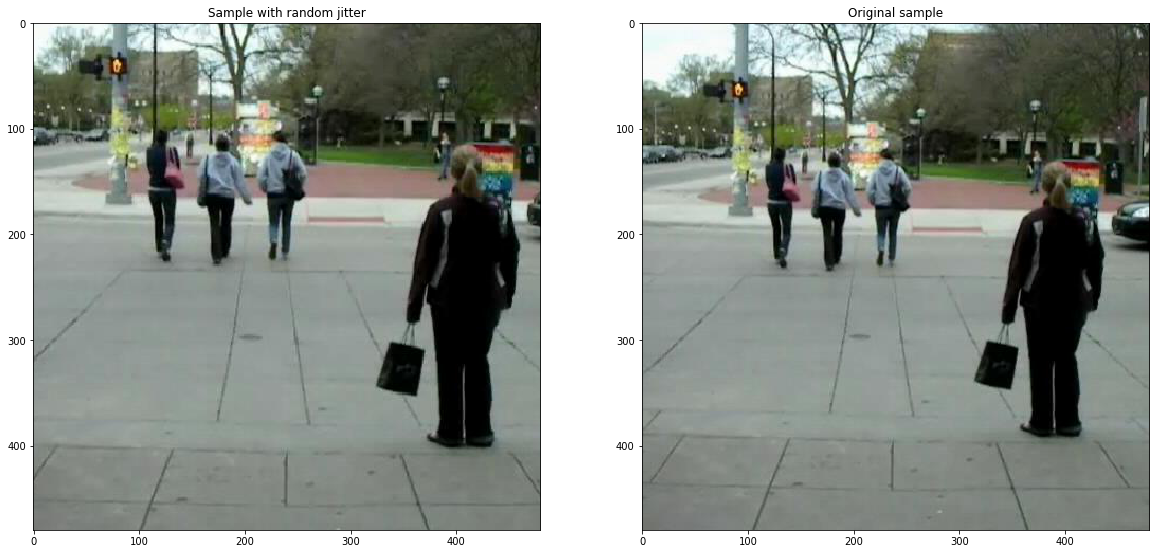

In [50]:
# TODO remove

import numpy as np
from matplotlib import pyplot as plt

from utils.image_transformation import normalize, random_jitter


np_img = np.array(Image.open("data_set/photos/0.jpg"))
print(np_img.shape)

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.title('Sample with random jitter')
plt.imshow(normalize(random_jitter(np_img, target_size=np_img.shape[:2], mirror=True)) * 0.5 + 0.5)

plt.subplot(122)
plt.title('Original sample')
plt.imshow(normalize(np_img) * 0.5 + 0.5)